On April 18 2017, Conservative British Prime Minister Theresa May called for snap parliamentary elections. May wanted to secure her party’s authority to proceed with Brexit, the negotiations for withdrawal of Britain from the European Union.

She said Conservatives needed a larger parliamentary majority to ensure political stability during the EU talks. The last British elections took place in May 2015, when Conservatives gained a slim parliamentary majority of just 4 seats.

Also, the Labour party, the main opposition, was in turmoil. Jeremy Corbyn, a socialist, became Labour leader in 2015. This caused controversy with the more fiscally conservative Labour MPs. It seemed Conservatives could capitalize on Labour’s disarray.

The UK Parliament has 650 seats. The minimum number of seats needed to form a majority is 326 seats. Conservatives held 330 seats going into the election.

This election dealt with issues of terrorism, Brexit and social programs.

### Collect the Data

In [36]:
#Imports

#For data analysis:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [37]:
#Use this to grab data from the web

import requests

#We'll also use StringIO to work with csv file

from io import StringIO

In [38]:
#Collect the data from the website
url = 'http://elections.huffingtonpost.com/pollster/2017-united-kingdom-general-election.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [39]:
poll_df = pd.read_csv(poll_data)

In [40]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 20 columns):
Pollster                  68 non-null object
Start Date                68 non-null object
End Date                  68 non-null object
Entry Date/Time (ET)      68 non-null object
Number of Observations    68 non-null int64
Population                68 non-null object
Mode                      68 non-null object
Conservative              68 non-null float64
Labour                    68 non-null float64
UKIP                      68 non-null float64
Liberal Democrat          68 non-null float64
SNP                       68 non-null float64
Other                     68 non-null float64
Undecided                 56 non-null float64
Pollster URL              68 non-null object
Source URL                68 non-null object
Partisan                  68 non-null object
Affiliation               68 non-null object
Question Text             1 non-null object
Question Iteration        68 non-null

In [41]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Conservative,Labour,UKIP,Liberal Democrat,SNP,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Ipsos MORI/Evening Standard,2017-06-06,2017-06-07,2017-06-08T12:42:36Z,1291,Adults,Live Phone,41.0,41.0,3.0,7.0,4.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.ipsos.com/sites/default/files/2017...,Nonpartisan,None,NaN,1
1,Survation,2017-06-06,2017-06-07,2017-06-08T12:39:21Z,2798,Likely Voters,Internet,34.0,33.0,2.0,6.0,3.0,3.0,18.0,http://elections.huffingtonpost.com/pollster/p...,http://survation.com/wp-content/uploads/2017/0...,Nonpartisan,None,NaN,1
2,ICM Unlimited/The Guardian,2017-06-06,2017-06-07,2017-06-07T18:47:58Z,1532,Adults,Internet,36.0,31.0,4.0,5.0,4.0,2.0,18.0,http://elections.huffingtonpost.com/pollster/p...,https://www.icmunlimited.com/wp-content/upload...,Nonpartisan,None,NaN,1
3,YouGov/The Times,2017-06-05,2017-06-07,2017-06-08T12:36:55Z,2130,Adults,Internet,33.0,31.0,3.0,8.0,3.0,3.0,18.0,http://elections.huffingtonpost.com/pollster/p...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,None,NaN,1
4,ComRes/Independent,2017-06-05,2017-06-07,2017-06-08T12:34:32Z,2051,Adults,Live Phone,32.0,27.0,11.0,7.0,4.0,5.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://www.comresglobal.com/wp-content/uploads...,Nonpartisan,None,NaN,1


### Who Participated?

Text(0.5,0.98,'Participation Characteristic of the Polls')

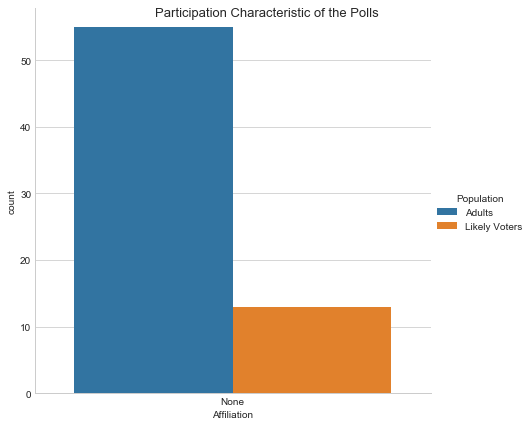

In [42]:
g = sns.factorplot('Affiliation',kind='count',data=poll_df,hue='Population',size=6,aspect=1)

g.fig.suptitle('Participation Characteristic of the Polls', fontsize=13)

### Averages

Text(0,0.5,'Poll Average (%)')

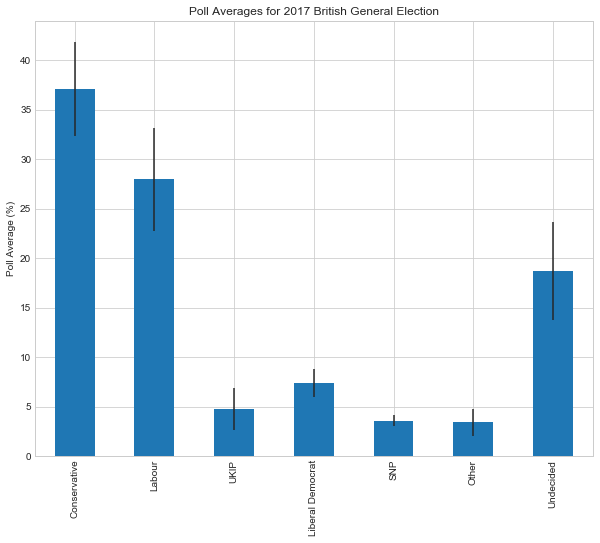

In [43]:
#What are the average percentages vales b/w parties?

avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0,inplace=True )
avg.drop('Question Iteration',axis=0,inplace=True)

#Get standard deviation and check the error

std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)

#Make a plot
#yerr (y error) set equal to std

brit_election_avg = avg.plot(yerr=std,kind='bar',figsize=(10,8),legend=False)
brit_election_avg.set_title('Poll Averages for 2017 British General Election')
brit_election_avg.set_ylabel('Poll Average (%)')

In [44]:
#More precise display of averages and standard deviation

avg.head()

,0
Conservative,37.132353
Labour,27.970588
UKIP,4.764706
Liberal Democrat,7.382353
SNP,3.573529


In [45]:
std.head()

,0
Conservative,4.747048
Labour,5.186005
UKIP,2.081315
Liberal Democrat,1.414524
SNP,0.581202


In [46]:
#Concatenate the Average and Stan Dev DataFrame

poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Show
poll_avg

,Average,STD
Conservative,37.132353,4.747048
Labour,27.970588,5.186005
UKIP,4.764706,2.081315
Liberal Democrat,7.382353,1.414524
SNP,3.573529,0.581202
Other,3.397059,1.394442
Undecided,18.714286,4.978917


The Conservatives clearly were more popular during the campaign, on average. They had a strong lead on Labour. The Undecideds made up a rather significant portion of those polled.

### How does the data look over the course of the campaign?

Text(0.5,1,'2017 British General Election Polls')

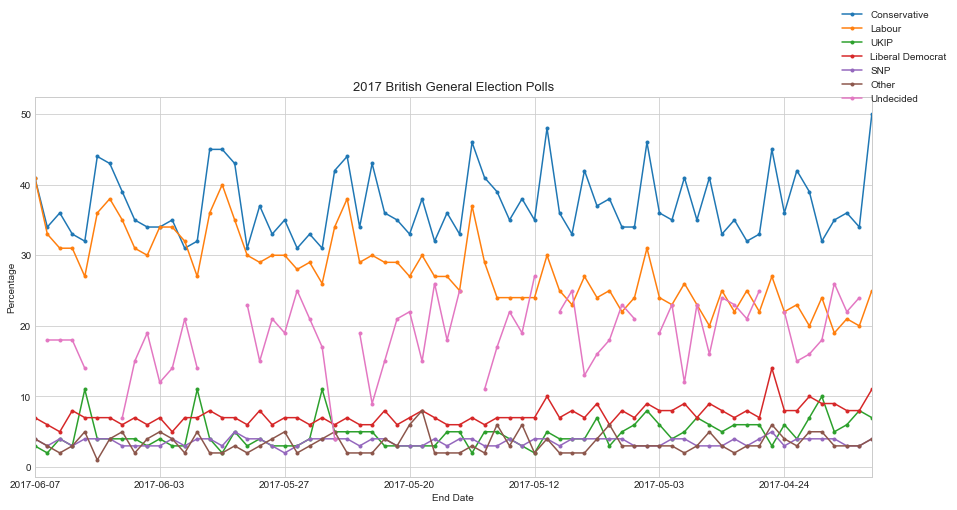

In [47]:
#2017 British election Time Series scatter plot to illustrat voter sentiment

voter_sent = poll_df.plot(x='End Date',y=['Conservative','Labour','UKIP','Liberal Democrat','SNP','Other','Undecided'],figsize=(15,7),marker='.',legend=False)
voter_sent.legend(bbox_to_anchor=(1.1,1.25))
voter_sent.set_ylabel('Percentage')
voter_sent.set_title('2017 British General Election Polls',fontsize=13)

In April, the Conservatives might have expected an easy victory. By the end of May, Labour was catching up. While not consistently monitored, the Undecideds rivaled Labour in numbers in the first half of the short election campaign. The other parties rarely breached 10% favorability. Undecideds were consistently the third largest group of polling participants.

In [48]:
#Define a new column in our dataframe to take into account the difference between conservatives and labor

#import time stamp

from datetime import datetime

poll_df['Poll Difference (%)'] = (poll_df.Conservative - poll_df.Labour)/100

In [49]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Conservative,Labour,UKIP,...,SNP,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Poll Difference (%)
0,Ipsos MORI/Evening Standard,2017-06-06,2017-06-07,2017-06-08T12:42:36Z,1291,Adults,Live Phone,41.0,41.0,3.0,...,4.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.ipsos.com/sites/default/files/2017...,Nonpartisan,None,NaN,1,0.00
1,Survation,2017-06-06,2017-06-07,2017-06-08T12:39:21Z,2798,Likely Voters,Internet,34.0,33.0,2.0,...,3.0,3.0,18.0,http://elections.huffingtonpost.com/pollster/p...,http://survation.com/wp-content/uploads/2017/0...,Nonpartisan,None,NaN,1,0.01
2,ICM Unlimited/The Guardian,2017-06-06,2017-06-07,2017-06-07T18:47:58Z,1532,Adults,Internet,36.0,31.0,4.0,...,4.0,2.0,18.0,http://elections.huffingtonpost.com/pollster/p...,https://www.icmunlimited.com/wp-content/upload...,Nonpartisan,None,NaN,1,0.05
3,YouGov/The Times,2017-06-05,2017-06-07,2017-06-08T12:36:55Z,2130,Adults,Internet,33.0,31.0,3.0,...,3.0,3.0,18.0,http://elections.huffingtonpost.com/pollster/p...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,None,NaN,1,0.02
4,ComRes/Independent,2017-06-05,2017-06-07,2017-06-08T12:34:32Z,2051,Adults,Live Phone,32.0,27.0,11.0,...,4.0,5.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://www.comresglobal.com/wp-content/uploads...,Nonpartisan,None,NaN,1,0.05


In [50]:
poll_df.tail()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Conservative,Labour,UKIP,...,SNP,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Poll Difference (%)
63,Survation/Mail on Sunday,2017-04-21,2017-04-22,2017-04-27T18:16:20Z,2072,Adults,Live Phone,32.0,24.0,10.0,...,4.0,5.0,18.0,http://elections.huffingtonpost.com/pollster/p...,http://survation.com/wp-content/uploads/2017/0...,Nonpartisan,None,NaN,1,0.08
64,YouGov/The Times,2017-04-20,2017-04-21,2017-04-27T17:55:42Z,1590,Adults,Internet,35.0,19.0,5.0,...,4.0,3.0,26.0,http://elections.huffingtonpost.com/pollster/p...,http://d25d2506sfb94s.cloudfront.net/cumulus_u...,Nonpartisan,None,NaN,1,0.16
65,ICM Unlimited/ITV,2017-04-19,2017-04-21,2017-04-27T18:07:04Z,2027,Adults,Internet,36.0,21.0,6.0,...,3.0,3.0,22.0,http://elections.huffingtonpost.com/pollster/p...,https://www.icmunlimited.com/wp-content/upload...,Nonpartisan,None,NaN,1,0.15
66,Opinium/Observer,2017-04-19,2017-04-20,2017-04-27T18:54:50Z,2003,Adults,Internet,34.0,20.0,8.0,...,3.0,3.0,24.0,http://elections.huffingtonpost.com/pollster/p...,http://opinium.co.uk/wp-content/uploads/2017/0...,Nonpartisan,None,NaN,1,0.14
67,ComRes/Sunday Mirror,2017-04-19,2017-04-20,2017-04-27T18:02:11Z,2074,Adults,Live Phone,50.0,25.0,7.0,...,4.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.comresglobal.com/wp-content/uploads...,Nonpartisan,None,NaN,1,0.25


In [51]:
#Create a new dataframe
#Use GroupBy to group the polls by their start date and then sort it by the start date

start_poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

#This says 'Take your poll df, group it by the start dates and then set 'as_index' to false'
#'Then take the average of all those polls'
#'as_index=False' means you keep the current index

In [52]:
start_poll_df.head()

,Start Date,Number of Observations,Conservative,Labour,UKIP,Liberal Democrat,SNP,Other,Undecided,Question Iteration,Poll Difference (%)
0,2017-04-19,2034.666667,40.000000,22.000000,7.000000,9.000000,3.333333,3.333333,23.0,1.0,0.180000
1,2017-04-20,1210.000000,38.666667,20.666667,5.333333,9.000000,4.000000,3.666667,19.0,1.0,0.180000
2,2017-04-21,1700.000000,37.666667,24.333333,6.333333,10.333333,4.000000,5.000000,20.0,1.0,0.133333
3,2017-04-25,1798.500000,34.000000,22.000000,6.000000,7.000000,4.000000,2.500000,24.0,1.0,0.120000
4,2017-04-26,2093.000000,32.000000,25.000000,6.000000,8.000000,3.000000,3.000000,21.0,1.0,0.070000


Text(0.5,1,'Difference between 2017 British General Election Poll Results for Conservative and Labour')

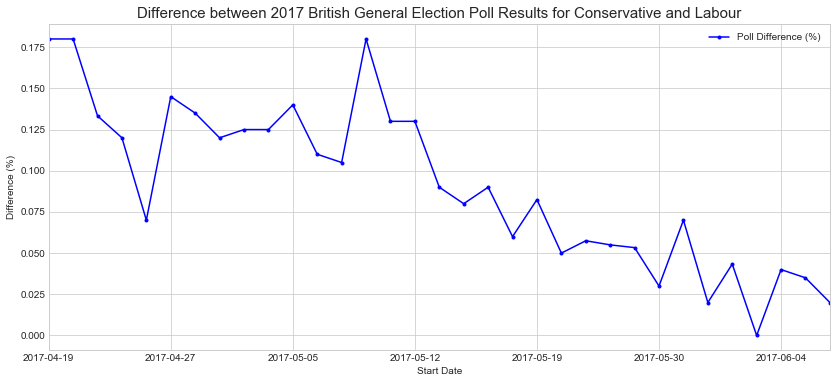

In [53]:
#Use the new dataframe to plot our difference ('the difference b/w candidates popularity, aka sentiment') over time

diff_plot = start_poll_df.plot('Start Date','Poll Difference (%)',figsize=(14,6),marker='.',linestyle='-',color='blue')
diff_plot.set_ylabel('Difference (%)')
diff_plot.set_title('Difference between 2017 British General Election Poll Results for Conservative and Labour',fontsize=15)

The polls tightened in the lead up to the election. Labor managed to generate a surge that in the end truly rivaled the Conservatives.

In [54]:
#How many times did Conservatives lead the polls?

for difference in start_poll_df['Poll Difference (%)']:
    if difference > .1:
        print(difference)

0.18
0.18
0.133333333333
0.12
0.145
0.135
0.12
0.125
0.125
0.14
0.11
0.105
0.18
0.13
0.13


In [55]:
#How many times did labor lead?


for difference in start_poll_df['Poll Difference (%)']:
    if difference < -.05:
        print(difference)

In [56]:
#0 times

In [57]:
#Find dates

#Set row count and the xlimit list

row_in = 0
xlimit = []

#Cycle through the dates until 2017-06 is found then print row index
for date in start_poll_df['Start Date']:
    if date[0:7] == '2017-04': #if first 7 terms are equal to May
        xlimit.append(row_in)
        row_in += 1 #row in is counting the index rw, as it goes the for loop
    elif date[0:7]  == '2017-06':
        xlimit.append(row_in) #if first 7 terms are equal to May
        row_in += 1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

0
32


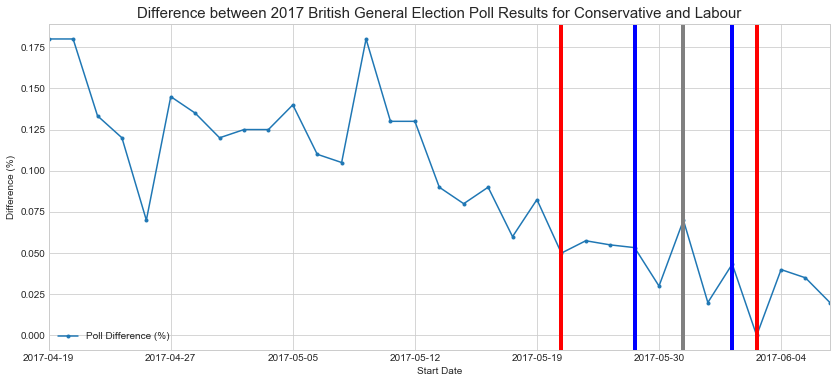

In [58]:
#Replot the Difference
#Keep everything the same, except now set xlimits

#Not finished, add debates and terror attacks
diff_start_plot = start_poll_df.plot('Start Date','Poll Difference (%)',figsize=(14,6),marker='.',xlim=(0,32))
diff_start_plot.set_ylabel('Difference (%)')
diff_start_plot.set_title('Difference between 2017 British General Election Poll Results for Conservative and Labour',fontsize=15)
#Let's add markers to the debate dates, with arithmatic!

#May attended no telvised debates
#Corbyn attended one debate in Cambrdige on May 31st. The Conservatives were represented Amber Rudd

plt.axvline(x=26,linewidth=4,color='grey')

#Televised Interview and studio audience questions: 
#Sky news & Channel 4: May 29th
#BBC Question Time: June 2nd

plt.axvline(x=24,linewidth=4,color='blue')

plt.axvline(x=28,linewidth=4,color='blue')


#Terror Attacks During the Campaign:
#Manchester Arena Bombing: May 22nd
#London Bridge Attack: June 3rd 

plt.axvline(x=21,linewidth=4,color='red')

plt.axvline(x=29,linewidth=4,color='red')

Labour gained after each televised Q/A and debate. Theresa May refused to participate in televised debates. She did participate in televised question and answer sessions with a studio audience. The only televised debate took place between Corbyn and Amber Rudd , a Conservative politician, who stood in for May. This may have hurt the Conservatives, as their support dropped after each televised event.

Conservative polls gained after two terrorist attacks, in Manchester on May 22 and the London Bridge attack on June 3. Polls were especially close before the London Bridge attack. Afterward, opinion swung toward the Conservatives considerably.

In [60]:

headings = ["Party","Final Poll (%)","Final Result (%)"]

table = [
    
    ['Conservative',36.8,42.4],
    ['Labour',33.6,40.0],
    ['Liberal Dem',6.7,7.4],
    ['UKIP',3.4,1.8],
    ['SNP',3.6,3.0],
]

final_result = pd.DataFrame(columns=headings,data=table)
final_result

,Party,Final Poll (%),Final Result (%)
0,Conservative,36.8,42.4
1,Labour,33.6,40.0
2,Liberal Dem,6.7,7.4
3,UKIP,3.4,1.8
4,SNP,3.6,3.0


In [61]:
final_result.set_index('Party',inplace=True)

In [62]:
final_result

,Final Poll (%),Final Result (%)
Party,,
Conservative,36.8,42.4
Labour,33.6,40.0
Liberal Dem,6.7,7.4
UKIP,3.4,1.8
SNP,3.6,3.0


In [63]:
#annotated Bar Graph

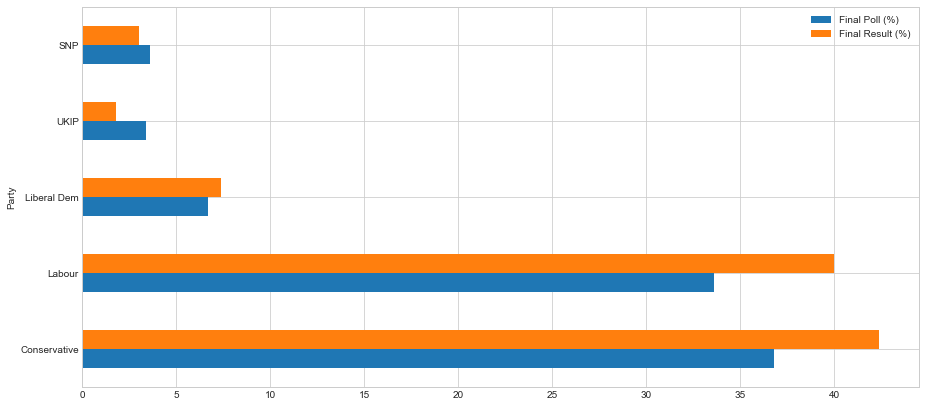

In [64]:
final_result.plot(kind='barh',figsize=(15,7))

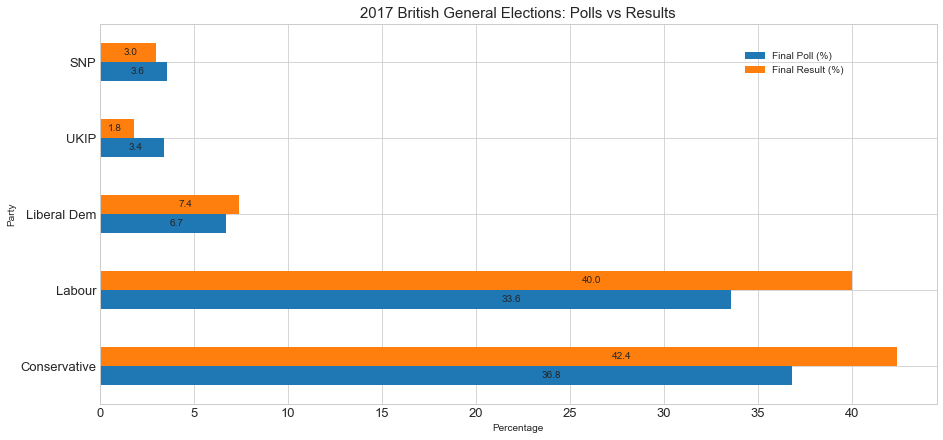

In [65]:
def autolabel(rects):
    x_pos = [rect.get_x() + rect.get_width()/1.5 for rect in rects]
    y_pos = [rect.get_y() + .75*rect.get_height() for rect in rects]
    #if height constant: hbars, vbars otherwise
    if (np.diff([plt.getp(item, 'width') for item in rects])==0).all():
        scores = [plt.getp(item, 'height') for item in rects]
    else:
        scores = [plt.getp(item,'width') for item in rects]
     #attach some text labels
    for rect, x, y, s in zip(rects, x_pos, y_pos, scores):
        ax.text(x,
                y,
                '%s'%s,
                ha='right',
                va='top')
    
ax = final_result.plot(kind='barh', figsize=(15,7),fontsize=13)
                            
  
ax.set_alpha(0.8)
ax.legend(bbox_to_anchor=(.9, .95))
ax.set_title('2017 British General Elections: Polls vs Results',fontsize=15)
ax.set_xlabel('Percentage')
autolabel(ax.patches)

Conservatives and Labour substantially outperformed their final opinion polls. This may have been a result of Undecided voters making a decision at the last moment. UKIP and the SNP under performed theirs. UKIP quite badly

### Conclusions

In a shocking upset, and a humiliation to May, Conservatives lost their over all majority in an election they were expecting to easily win.

The result of the June 8th election was a hung parliament, in which no single party held a majority. The Conservatives lost 13 seats to Labour, who gained 30. Conservatives lost seats to Lib Dems as well, who gained 4 seats.

The Scottish National Party lost 21 seats. They came to the fore during the referendum on Scottish Independence in 2015, which resulted in “stay”. There was talk of another referendum after Brexit because most Scots preferred to remain in the EU. Having lost their seats in this election puts a second Scottish Independence vote in doubt.

UKIP, the UK Independence Party, which was a major proponent of withdrawal during the Brexit referendum, lost its one and only seat. Their vote share went from 12.6% in the last election to just 1.8% this time around.

Conservatives started with strong polls. Labour ran a grass roots campaign that saw 3 million new registered voters, many under 25. Voter participation was 68.7%, the highest rate since 1997.

Labor benefited from high turn-out of young voters. Both parties garnered more than 40% of the youth vote for the first time in 40 years.

Jeremy Corbyn ran an impassioned campaign. His party was able to mobilize voters due to anger over austerity programs and wage stagnation. He promised higher taxes and more government spending.  His leadership during the election allowed Labour to rally together to become a significant challenge to the Conservatives

In order to form a government, the Conservatives negotiated a coalition with the DUP, a Unionist party from Northern Ireland. This gave them enough seats to have a majority.

With such a tenuous hold on governmental authority, it will be difficult for the Conservatives to negotiate withdrawal going forward.